# Employee Exit Survey

## The Client
TAFE and DETE are vocational colleges in Australia. They have been doing exit surveys for a while and have now gathered a dataset of about 1600 results which they would like analysed. The client is focussed on internal contributing factors.

## Aims of Analysis: Dissatisfaction
The client has asked for a report to help them understand the results of their recent exit survey.

They wish to understand the profile of employees who cite dissatisfaction as a contributing factor to their exit from the organisation.

Leadership wants to understand where to target retention improvement strategies.

## Conclusions: Age and Dissatisfaction
Older employees make up a signficant proportion of the employee demographics at TAFE and DETE. This explained the much larger number of dissatisfied leavers amongster older populations.

Analysis revealed:
- TAFE: 46-50 and 21-25 are the most dissatisfied age groups, showing significant levels above the college's mean, and 10% more than other age groups.
- DETE: 51-50, 31-35, 26-30 are the most dissatisfied age groups, showing significant levels above the college's mean, and also 10% above that of other age groups.

# Visualisations

The correlation analysis revealed that there was likely a pattern in age and dissatisfaction. Initially, it seemed that older people were experiencing higher levels, but really it's younger and middle-aged people.

## A Story of Two Bar Charts

Bar charts, stacked as percentages, and arranged side-by-side make excellent tools for comparing.

At the end of this notebook there is a useful infographic to communicate the above analysis.

The bar charts allow the viewer to immediately grasp the comparison between TAFE and DETE and between the different age groups through use of similarity, proximity and (im)balance across a line of symmetry.

## Notebooks and Reports
The following notebooks and documents are part of this anaylsis:

### Jupyter Notebook Filename: Summary
- [employee_exit_survey_cleaning_1.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_1.ipynb): Columns drops, missing data, renaming columns, tidying data for consistency
- [employee_exit_survey_cleaning_2.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_2.ipynb): Adding calculated columns, adding category columns, further drops
- [employee_exit_survey_correlation.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_correlation.ipynb): Investigating correlations to guide analysis
- [employee_exit_survey_gender.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_gender.ipynb): Aggregation by pivot_table of gender subsets, visualisations
- [employee_exit_survey_age.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_age.ipynb): Aggregation by pivot_table of age subsets, visualisations
- [employee_exit_survey_conflict.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_conflict.ipynb): Exploration of conflict as a contributory factor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [2]:
survey = pd.read_csv('employee_exit_survey_clean_final.csv')

In [3]:
survey.head()

,Unnamed: 0,index,cf_to_private_sector,cf_health,cf_family,cf_dept_dissatisfaction,cf_job_dissatisfaction,cf_interpersonal_conflict,cf_other,institute_recognition,institute_job_security,dept_workload,dept_work_life_balance,dept_work_environment,gender,age,service_years,exit_year,college,cf_dept_or_job_dissatisfaction
0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,Female,26–30,1 to 2 Years,2010,TAFE,False
1,1,1,False,False,False,False,False,False,False,True,True,True,False,True,Female,NaN,NaN,2010,TAFE,False
2,2,2,False,False,False,False,False,False,False,False,False,False,False,False,Female,NaN,NaN,2010,TAFE,False
3,3,3,False,False,False,False,False,False,False,False,False,True,True,True,Female,NaN,NaN,2010,TAFE,False
4,4,4,True,False,False,False,False,False,False,True,False,True,True,True,Male,41–45,3 to 4 Years,2010,TAFE,False


# Exploratory Charts
From the initial exploration of correlations, there is a clear tendency for older employees to be more dissatisfied than younger ones.

It would be beneficial to explore:
- Measure the scale of increase in dissatisfaction as age increases
- Link to length of service to see if this is a factor (note initial correlation analysis did not suggest length of servce was correlated directly to dissatisfaction)
- Compare TAFE to DETE because there were clear differences.

## Baseline Age Charts
These charts describe the age and dissatisfaction profiles of the two colleges.

<AxesSubplot:title={'center':'Dept and Job Dissatisfaction as a CF by Age'}, xlabel='age'>

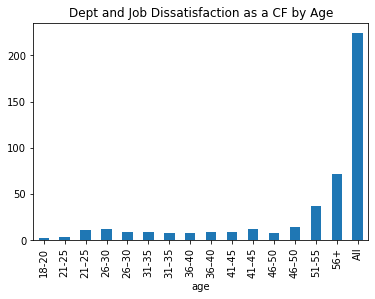

In [4]:
pv_age = survey.pivot_table(values='cf_dept_or_job_dissatisfaction', index='age', aggfunc=np.sum, margins=True)
pv_age.plot(kind='bar', xlim=((0,10)), title='Dept and Job Dissatisfaction as a CF by Age', legend=False)

Initially, there appears to be rise in dissatisfaction in older people, and perhaps a small increase in the 20-30 buckets.

To see if there is a tendency for these employees to cite dissatisfaction as their reason for leaving more than their peers, these values have to made proportionate to the age distribution.

<AxesSubplot:title={'center':'TAFE Age Distribution'}>

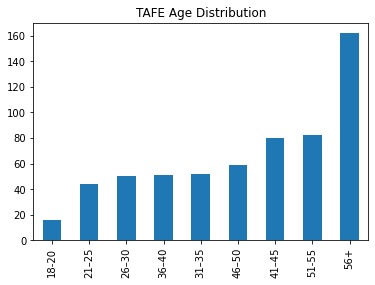

In [5]:
values = survey.loc[survey['college'] == 'TAFE','age']
values.value_counts().sort_values(ascending=True).plot(kind='bar', title='TAFE Age Distribution')

<AxesSubplot:title={'center':'DETE Age Distribution'}>

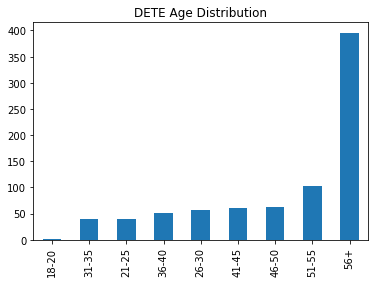

In [6]:
values = survey.loc[survey['college'] == 'DETE','age']
values.value_counts().sort_values(ascending=True).plot(kind='bar', title='DETE Age Distribution')

Both TAFE and DETE have many more employees aged 56+ than any other age group.

TAFE does not have a higher number of 20-30 year olds to correspond to the slight bulge in dissatisfaction we saw above.

Therefore, it is worth pressing on with a fulling proportional analysis.

In [7]:
# Split the dataset into TAFE and DETE because the age profile is different.
tafe_survey = survey[survey['college'] == 'TAFE']
dete_survey = survey[survey['college'] == 'DETE']

In [26]:
# Find dissatisfied leavers in each age bucket.
pv_tafe = tafe_survey.pivot_table(values='cf_dept_or_job_dissatisfaction', index='age', aggfunc=np.sum, margins=True).drop('All')
pv_dete = dete_survey.pivot_table(values='cf_dept_or_job_dissatisfaction', index='age', aggfunc=np.sum, margins=True).drop('All')

# Get TAFE DataFrame ready for converting to percentages.
pv_tafe['All'] = tafe_survey['age'].value_counts()
pv_tafe['Satisfied or Other'] = pv_tafe['All'] - pv_tafe['cf_dept_or_job_dissatisfaction']
print(pv_tafe)

# Get DETE DataFrame ready for converting to percentages.
pv_dete['All'] = dete_survey['age'].value_counts()
pv_dete['Satisfied or Other'] = pv_dete['All'] - pv_dete['cf_dept_or_job_dissatisfaction']
print(pv_dete)

       cf_dept_or_job_dissatisfaction  All  Satisfied or Other
age                                                           
18-20                               2   16                  14
21–25                              11   44                  33
26–30                               9   50                  41
31–35                               8   52                  44
36–40                               9   51                  42
41–45                              12   80                  68
46–50                              14   59                  45
51-55                              13   82                  69
56+                                21  162                 141
       cf_dept_or_job_dissatisfaction  All  Satisfied or Other
age                                                           
18-20                               0    1                   1
21-25                               4   40                  36
26-30                              12   57             

In [35]:
# Rename some columns and make it easier to work with.
new_cols = {
    'cf_dept_or_job_dissatisfaction':'Dissatisfied', 
    'All':'Total', 
    'Satisfied or Other':'Satisfied'
}

pv_tafe.rename(new_cols, axis=1, inplace=True)
pv_dete.rename(new_cols, axis=1, inplace=True)
print(pv_tafe)
print(pv_dete)


       Dissatisfied  Total  Satisfied
age                                  
18-20             2     16         14
21–25            11     44         33
26–30             9     50         41
31–35             8     52         44
36–40             9     51         42
41–45            12     80         68
46–50            14     59         45
51-55            13     82         69
56+              21    162        141
       Dissatisfied  Total  Satisfied
age                                  
18-20             0      1          1
21-25             4     40         36
26-30            12     57         45
31-35             9     39         30
36-40             8     51         43
41-45             9     61         52
46-50             8     63         55
51-55            24    103         79
56+              51    396        345


In [42]:
# Percentage conversion function for TAFE
def tafe_perc(item):
    div = item/pv_tafe['Total']
    return div*100

# Percentage conversion function for DETE
def dete_perc(item):
    div = item/pv_dete['Total']
    return div*100

# Apply the conversion and make a new DataFrame
columns = ['Dissatisfied','Satisfied']

pv_tafe_perc = pv_tafe[columns].apply(tafe_perc)
print(pv_tafe_perc)

pv_dete_perc = pv_dete[columns].apply(dete_perc)
print(pv_dete_perc)

       Dissatisfied  Satisfied
age                           
18-20     12.500000  87.500000
21–25     25.000000  75.000000
26–30     18.000000  82.000000
31–35     15.384615  84.615385
36–40     17.647059  82.352941
41–45     15.000000  85.000000
46–50     23.728814  76.271186
51-55     15.853659  84.146341
56+       12.962963  87.037037
       Dissatisfied   Satisfied
age                            
18-20      0.000000  100.000000
21-25     10.000000   90.000000
26-30     21.052632   78.947368
31-35     23.076923   76.923077
36-40     15.686275   84.313725
41-45     14.754098   85.245902
46-50     12.698413   87.301587
51-55     23.300971   76.699029
56+       12.878788   87.121212


Text(0, 0, 'hi')

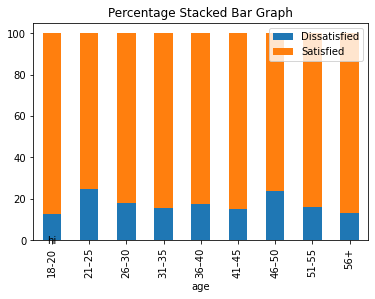

In [51]:
# Quick exploratory Plot
pv_tafe_perc.plot(kind='bar', stacked=True, title = 'Percentage Stacked Bar Graph', mark_right = True)


<AxesSubplot:xlabel='age'>

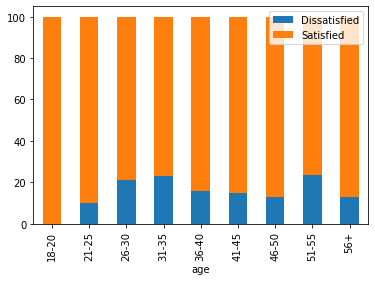

In [45]:
# Quick exploratory Plot
pv_dete_perc.plot(kind='bar', stacked=True)

There is no correlation between older employees and dissatisfaction. Older employees make a significant portion of the population which initially suggested that there may be a dissatisfaction problem in older employees. However, once adjusted to percentages in each age bucket, it is clear that there are no negative trends in that age group.

Other age groups vary fairly widely. For example, twice as many 31-35 year olds are dissatisfied as 21-25 year olds.

This information is worth knowing.

In [74]:
pv_tafe_perc.index

Index(['18-20', '21–25', '26–30', '31–35', '36–40', '41–45', '46–50', '51-55',
       '56+'],
      dtype='object', name='age')

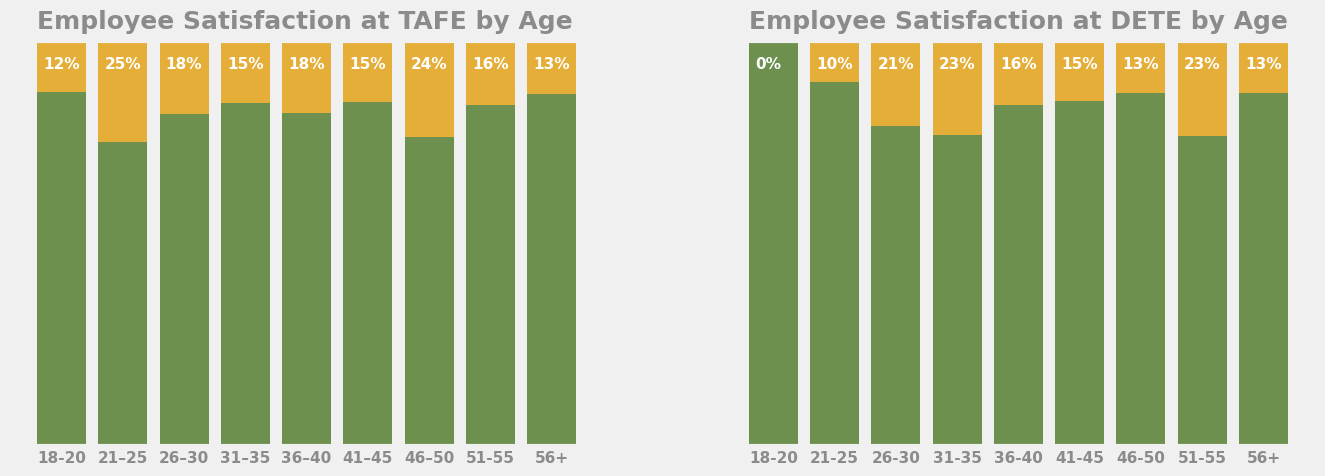

In [366]:
# ax = pd.crosstab(df['Name'], df['Subject']).apply(lambda r: r/r.sum()*100, axis=1)
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5), sharey=True)

style.use('default')
style.use('fivethirtyeight')

width = 0.8
satisfied_color = '#6d904f'
dissatisfied_color = '#e5ae38'

ax1.bar(pv_tafe_perc.index, pv_tafe_perc['Satisfied'],width,color=satisfied_color)
ax1.bar(pv_tafe_perc.index, pv_tafe_perc['Dissatisfied'],width, bottom=pv_tafe_perc['Satisfied'],color=dissatisfied_color)

ax2.bar(pv_dete_perc.index, pv_dete_perc['Satisfied'],width,color=satisfied_color)
ax2.bar(pv_dete_perc.index, pv_dete_perc['Dissatisfied'],width, bottom=pv_dete_perc['Satisfied'],color=dissatisfied_color)

x_tick_size = 11
x_tick_weight = 'bold'
x_tick_color = '#8b8b8b'

ax1.grid(False)
ax1.set_xticks(pv_tafe_perc.index)
ax1.set_xticklabels(pv_tafe_perc.index,size=x_tick_size, color=x_tick_color,weight=x_tick_weight)
ax1.set_yticklabels([])

ax2.grid(False)
ax2.set_xticks(pv_dete_perc.index)
ax2.set_xticklabels(pv_dete_perc.index,size=x_tick_size, color=x_tick_color,weight=x_tick_weight)
ax2.set_yticklabels([])

title_x = -0.4
title_y = 103
title_size = 18
title_weight = 'bold'
title_color = '#8b8b8b'
ax1.text(x=title_x, y=title_y, s='Employee Satisfaction at TAFE by Age',size=title_size, weight=title_weight, color=title_color)
ax2.text(x=title_x, y=title_y, s='Employee Satisfaction at DETE by Age',size=title_size, weight=title_weight, color=title_color)

t_perc_x = -0.3
t_perc_y = 93
t_perc_size = 11
t_perc_weight = 'bold'
t_perc_color = 'white'

for perc in pv_tafe_perc['Dissatisfied']:
    ax1.text(x=t_perc_x,y=t_perc_y,s=str(round(perc))+'%',size=t_perc_size,color=t_perc_color,weight=t_perc_weight)
    t_perc_x += 1

d_perc_x = -0.3
d_perc_y = 93
d_perc_size = 11
d_perc_weight = 'bold'
d_perc_color = 'white'

for perc in pv_dete_perc['Dissatisfied']:
    ax2.text(x=d_perc_x,y=d_perc_y,s=str(round(perc))+'%',size=d_perc_size,color=d_perc_color,weight=d_perc_weight)
    d_perc_x += 1

    
plt.show()

This visualisation is not optimal. The arrangement makes comparison hard, which is surely the point of having two charts. There's repetition in the title and in the age group axes.

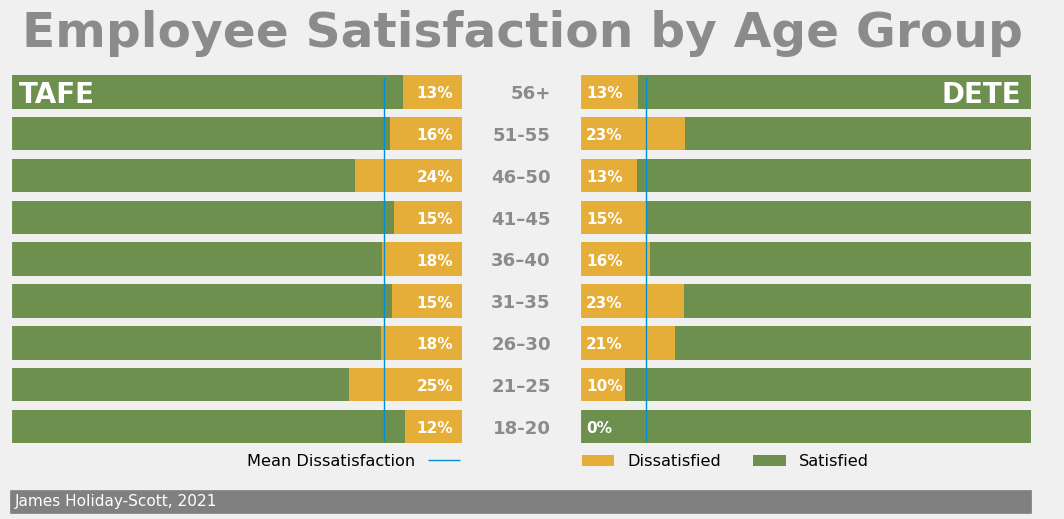

In [459]:
# ax = pd.crosstab(df['Name'], df['Subject']).apply(lambda r: r/r.sum()*100, axis=1)
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,5), sharey=True)

style.use('default')
style.use('fivethirtyeight')

width = 0.8
satisfied_color = '#6d904f'
dissatisfied_color = '#e5ae38'

ax1.barh(pv_tafe_perc.index, pv_tafe_perc['Satisfied'],width,color=satisfied_color)
ax1.barh(pv_tafe_perc.index, pv_tafe_perc['Dissatisfied'],width, left=pv_tafe_perc['Satisfied'],color=dissatisfied_color)

ax2.barh(pv_dete_perc.index, pv_dete_perc['Dissatisfied'],width,color=dissatisfied_color, label='Dissatisfied')
ax2.barh(pv_dete_perc.index, pv_dete_perc['Satisfied'],width, left=pv_dete_perc['Dissatisfied'],color=satisfied_color, label='Satisfied')

y_tick_size = 13
y_tick_weight = 'bold'
y_tick_color = '#8b8b8b'
x_pos = 1.15

ax1.grid(False)
ax1.set_yticks(pv_tafe_perc.index)
ax1.set_yticklabels(pv_tafe_perc.index,size=y_tick_size, color=y_tick_color,weight=y_tick_weight,x=x_pos)
ax1.set_xticklabels([])

ax2.grid(False)
ax2.set_xticklabels([])

title_x = 0.09
title_y = 0.9
title_size = 35
title_weight = 'bold'
title_color = '#8b8b8b'
fig.text(x=title_x, y=title_y, s='Employee Satisfaction by Age Group',size=title_size, weight=title_weight, color=title_color)

t_perc_x = 90
t_perc_y = -0.15
t_perc_size = 11
t_perc_weight = 'bold'
t_perc_color = 'white'

for perc in pv_tafe_perc['Dissatisfied']:
    ax1.text(x=t_perc_x,y=t_perc_y,s=str(round(perc))+'%',size=t_perc_size,color=t_perc_color,weight=t_perc_weight)
    t_perc_y += 1

d_perc_x = 1.5
d_perc_y = -0.15
d_perc_size = 11
d_perc_weight = 'bold'
d_perc_color = 'white'

for perc in pv_dete_perc['Dissatisfied']:
    ax2.text(x=d_perc_x,y=d_perc_y,s=str(round(perc))+'%',size=d_perc_size,color=d_perc_color,weight=d_perc_weight)
    d_perc_y += 1



ax1.text(x=2,y=7.75,s='TAFE',color='white',weight='bold',size=20)
ax2.text(x=80,y=7.75,s='DETE',color='white',weight='bold',size=20)

ax1.axvline(100-pv_tafe_perc['Dissatisfied'].mean(), linewidth=1,ymin=0.05, ymax=0.95,label='Mean Dissatisfaction')
ax2.axvline(pv_dete_perc['Dissatisfied'].mean(), linewidth=1,ymin=0.05, ymax=0.95)

ax1.legend(ncol=3,fontsize='small', loc='right', bbox_to_anchor=(0.98, 0),markerfirst=False,frameon=False)
ax2.legend(ncol=3,fontsize='small', loc='right', bbox_to_anchor=(0.64, 0),frameon=False)

ax1.text(x=1, y=-1.9, s='James Holiday-Scott, 2021' + ' '*166, backgroundcolor='grey', color='white', size=11)

plt.show()

This visualisation is much more efficient and uses proximity to the axis and similarity across a line of symmetry to communicate the comparison effortlessly.

## Conclusions: Age and Dissatisfaction
Older employees make up a signficant proportion of the employee demographics at TAFE and DETE. This explained the much larger number of dissatisfied leavers amongster older populations.

Analysis revealed:
- TAFE: 46-50 and 21-25 are the most dissatisfied age groups, showing significant levels above the college's mean, and 10% more than other age groups.
- DETE: 51-50, 31-35, 26-30 are the most dissatisfied age groups, showing significant levels above the college's mean, and also 10% above that of other age groups.